# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
# set the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [4]:
# Read the healthcare dataset file
data = pd.read_csv("/content/ExtraaLearn.csv")

# Rename print media columns to be more interpretable
data.rename(columns={'print_media_type1': 'newspaper', 'print_media_type2': 'magazine'}, inplace=True)

## Data Overview

In [5]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,newspaper,magazine,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [6]:
data.shape

(4612, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   newspaper              4612 non-null   object 
 10  magazine               4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations**

*   No null data exists in the dataset since the non-null values are all the same as the total number of rows in the dataset
*   ID, current_occupation, first_interaction, profile_completed, last_activity, etc are all objects and the rest are either ints or floats




In [8]:
print(data['ID'].value_counts())
print("-"*50)
print(data['ID'].value_counts().sum())
print("-"*50)
data['ID'].is_unique

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
--------------------------------------------------
4612
--------------------------------------------------


True

**Observation**

* Since the count looks to be all 1's, the sum equals the same number of rows, and is_unique is true, we can conclude all rows have a unique ID.




In [9]:
data.duplicated().sum()

0

**Observation**
*   There are no rows with duplicated data so we can drop the ID column since it won't add any value to the analysis.



In [10]:
# dropping ID from the data since it won't add any value to the modelling
data = data.drop(columns=["ID"])

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


**Observations**


*   The average age in the dataset is 46 and the min and max is 18 and 63, respectively. This makes sense since professional aged people are the target audience for our services.
*   The average number of website visits is about 3.5 and the min and max are 0 and 30, respectively.
*   The average time spent on the website is 724 min, and the min and max are 0 and 2537, respectively, which indicates users could spend more time to maximize their benefit.
*   The average number of page views per visit is 3, and the min and max are 0 and 18, respectively.
*   The status is the dependent variable we are trying to improve and we will be further classifying this.



In [12]:
# List of all the categorical variables
categorical_cols = ["current_occupation", "first_interaction", "profile_completed", "last_activity", "newspaper", "magazine", "digital_media", "educational_channels", "referral"]
for col in categorical_cols:
  print(data[col].value_counts(1))
  print("-" * 50)

current_occupation
Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website      0.55117
Mobile App   0.44883
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High     0.49089
Medium   0.48591
Low      0.02320
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: proportion, dtype: float64
--------------------------------------------------
newspaper
No    0.89224
Yes   0.10776
Name: proportion, dtype: float64
--------------------------------------------------
magazine
No    0.94948
Yes   0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No    0.88573
Yes   0.11427
Name: proportion, dtype: float64
----------------------------------

###Observations


*   The majority of people are professionals however a fairly large percentage are unemployed which would suggest they are trying to level up their skillset to be more marketable in the workforce.
*   First interactions with the product are pretty evenly split between the web site and the mobile app.
*   Most people are making a solid attempt to fill out their profile with only 2% providing little info.
*   About half of the last interactions a lead has is through email, with phone and website about evenly split with the remaining.
*   The newpaper, magazine, digital, educational, and referral channels are overwhelming not reaching leads which may imply that leads are coming to the site through other means such as google search or word of mouth.



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### **Univariate Analysis**

In [13]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

#### **Age of the Lead**

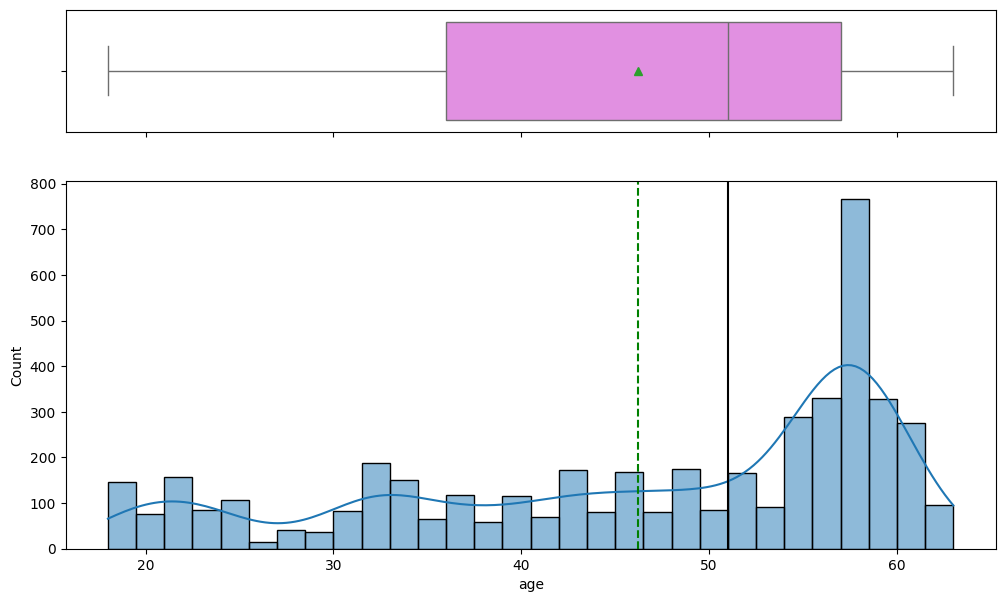

In [14]:
histogram_boxplot(data, "age", kde=True, bins = 30)

**Observations**


*   The age distribution is left skewed, with the peak age happening around 57 which is interesting to note since one might expect a more uniform distribution.
*   The mean age is around 46 years old, with none younger than 18 or older then 63, as expected.
*   No outliers exist



#### **Current Occupation**

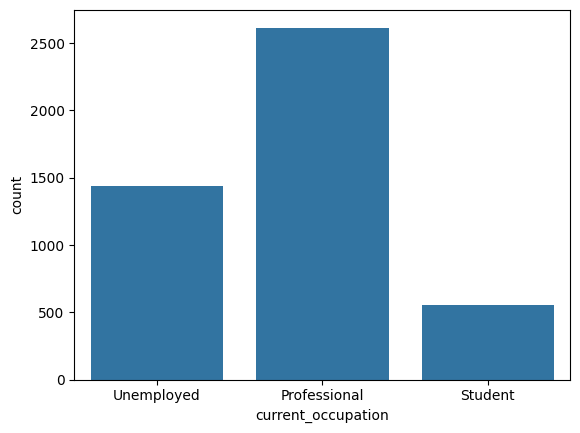

In [15]:
sns.countplot(x='current_occupation', data=data)
plt.show()

**Observations**
*   As our previous observations show, the professional group has the highest interest followed by unemployed and then student.

#### **First Interaction**



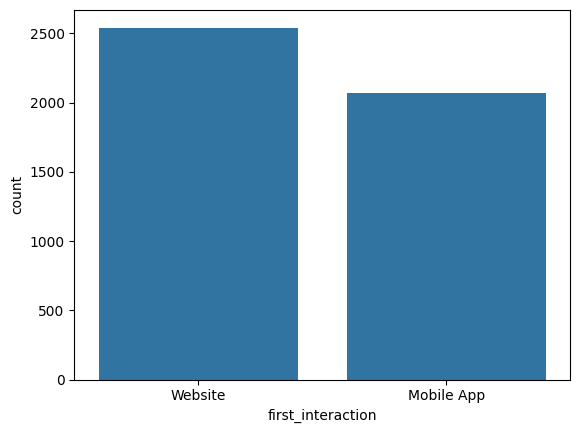

In [16]:
sns.countplot(x='first_interaction', data=data)
plt.show()

**Observations**
*   Website interactions are slightly higher than mobile app interactions, but they are pretty close.

#### **Profile Completed**

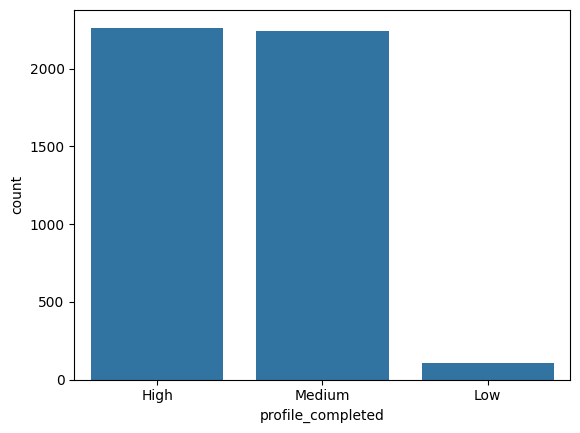

In [17]:
sns.countplot(x='profile_completed', data=data)
plt.show()

**Observations**
*   High and medium far outnumber the low category which shows most are making solid progress filling out their profiles.

#### **Website Visits**

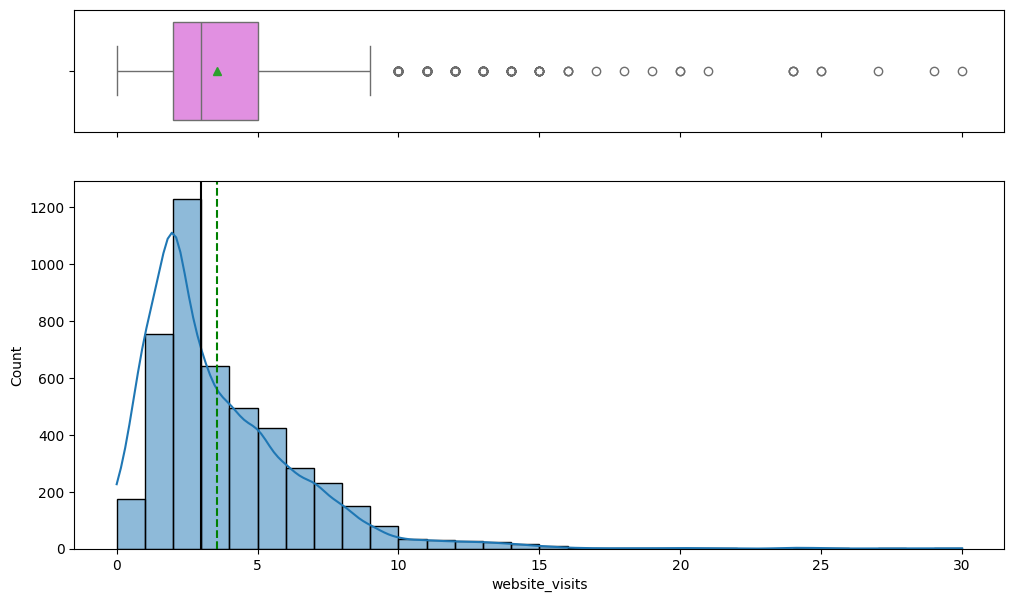

In [18]:
histogram_boxplot(data, "website_visits", kde=True, bins = 30)

**Observations**

*   The distribution is right skewed.
*   The peak number of website visits is 3.
*   The mean is just larger than the peak and there are a decent number of outliers at the top end of the range.



#### **Time Spent**

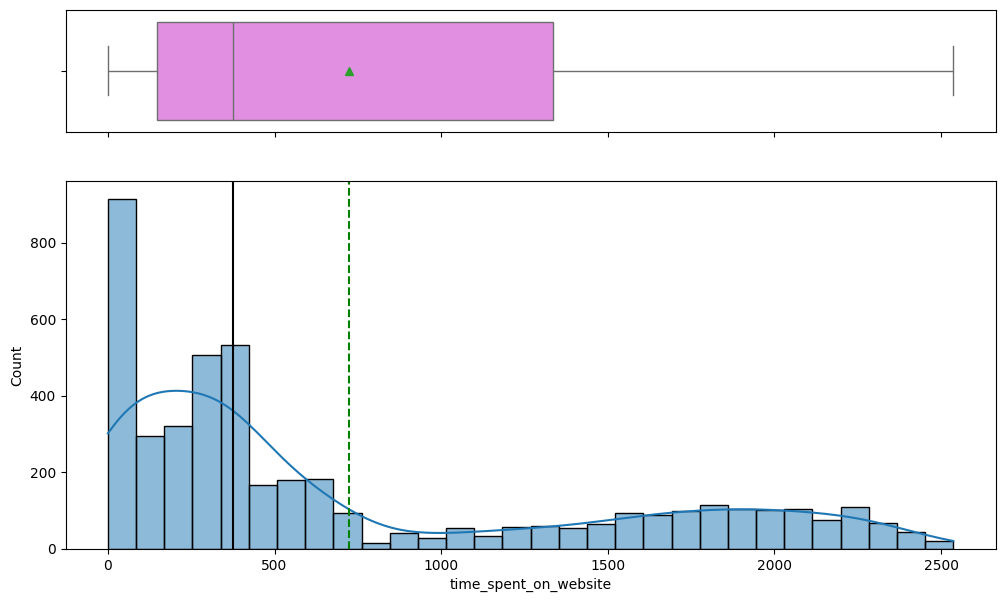

In [19]:
histogram_boxplot(data, "time_spent_on_website", kde=True, bins = 30)

**Observations**

*   The distribution is right skewed.
*   The mean is around 700.
*   The majority of users are spending little time on the platform which suggests there is definitely engagement issues that can be improved.



#### **Page Views per Visit**

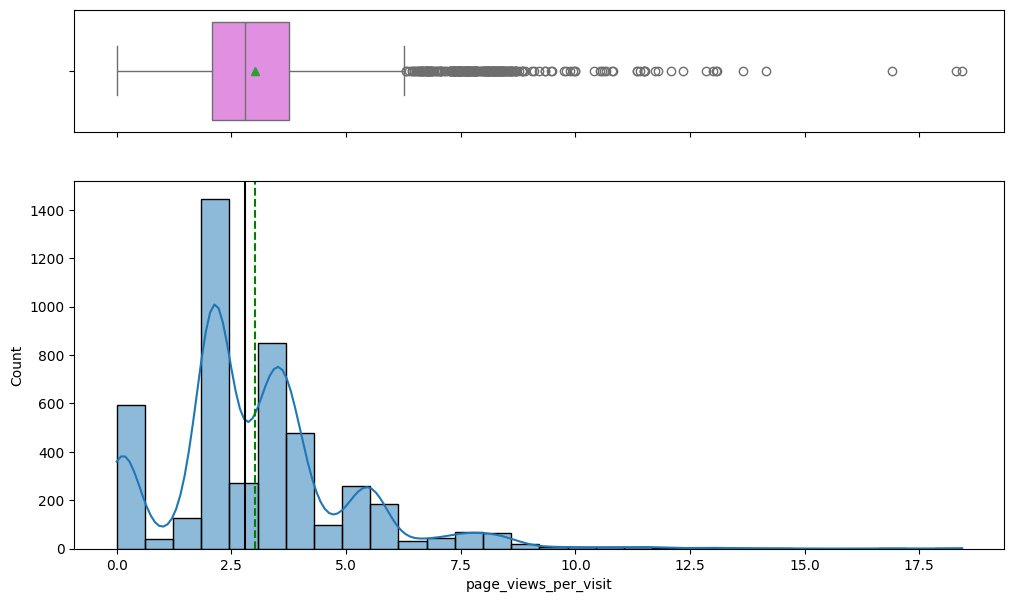

In [20]:
histogram_boxplot(data, "page_views_per_visit", kde=True, bins = 30)

**Observations**

*   This distribution is a little irregular but still right skewed.
*   The peak number of page views is around 2.5 but the mean is around 3.
*   However, there are a lot of outliers at the top end of the range indicating heavier usage.



#### **Last Activity**

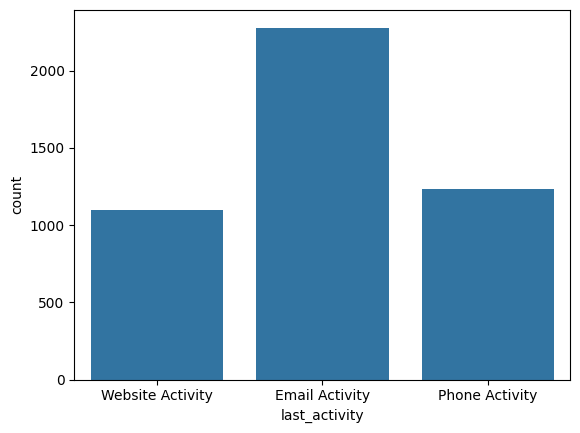

In [21]:
sns.countplot(x='last_activity', data=data)
plt.show()

**Observations**

*   The highest number of last activities are from emails, which seems appropriate because someone from ExtraaLearn is likely reaching out.
*   Website and Phone are similar in count.



#### **Media Attributions**

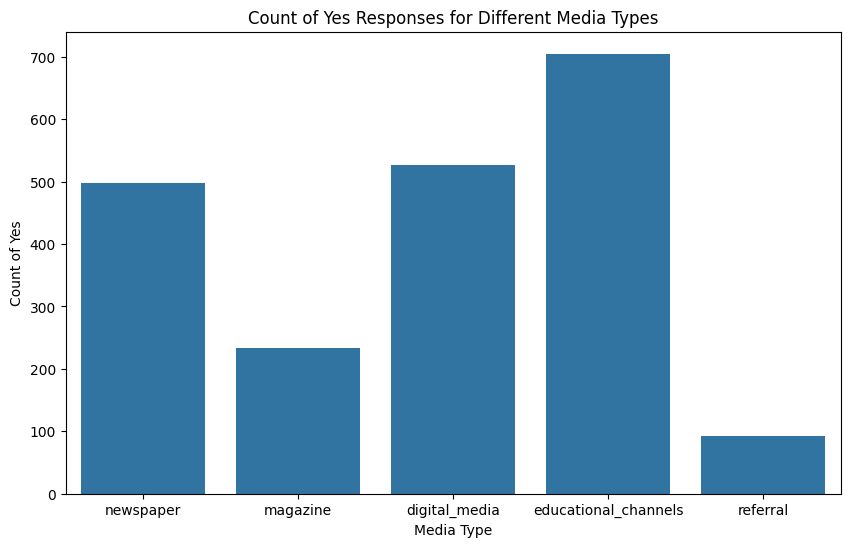

In [22]:
columns_of_interest = ['newspaper', 'magazine', 'digital_media', 'educational_channels', 'referral']

# Filter rows where the value is 'Yes' for each column of interest
filtered_data = data[columns_of_interest].apply(lambda x: x[x == 'Yes'].count()).reset_index()
filtered_data.columns = ['Media_Type', 'Count']

# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Media_Type', y='Count', data=filtered_data)
plt.title('Count of Yes Responses for Different Media Types')
plt.xlabel('Media Type')
plt.ylabel('Count of Yes')
plt.show()

**Observations**

*   The highest attribution channel is educational, but newspaper and digital ads were similar in magnitude.

### **Bivariate Analysis**

<Axes: >

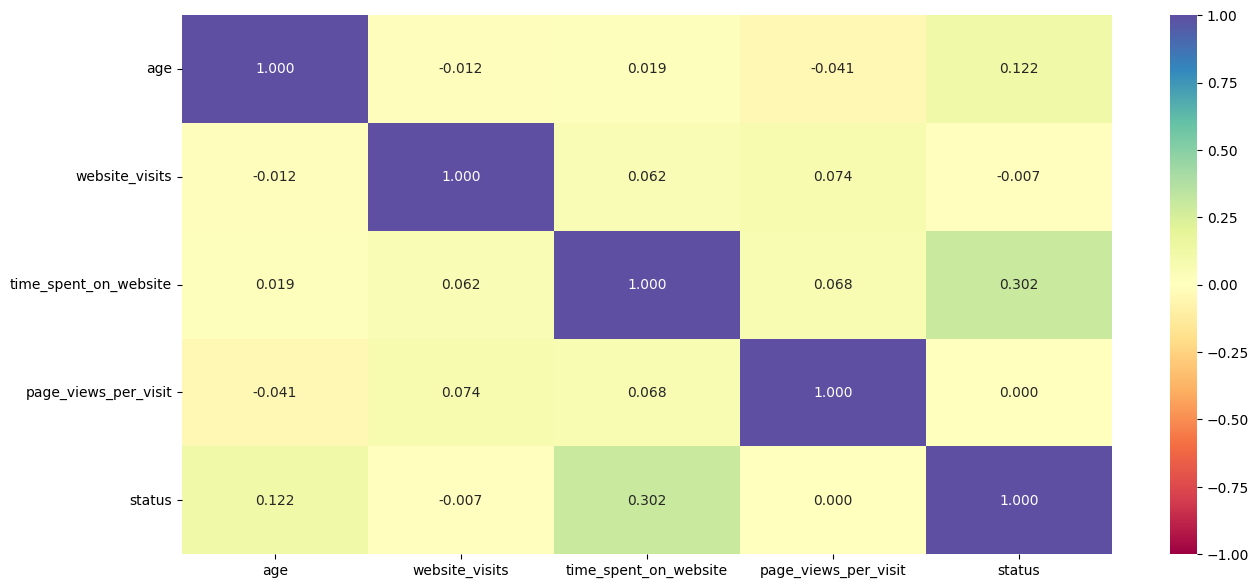

In [23]:
# Finding the correlation between various columns of the dataset
plt.figure(figsize = (15,7))
# Drop non numeric columns
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".3f", cmap = "Spectral")

**Observations**


*   Not a lot of correlation between the numeric columns.
*   The highest correlation seems to be between time spent on the site and status.



In [24]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    # Get the counts of target categories for each predictor category
    crosstab = pd.crosstab(data[predictor], data[target], normalize='index')

    # reorder to have the 1's at the bottom
    crosstab = crosstab[[1, 0]]

    # Rename the columns
    crosstab.columns = ['cust_converted', 'non_converted']

    # Plot the stacked bar chart
    crosstab.plot(kind='bar', stacked=True)

    # Add labels and title
    plt.xlabel(predictor)
    plt.ylabel('Conversion Rate')
    plt.title(f'Stacked Bar Plot of {target} by {predictor}')
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

    # Show the plot
    plt.show()

####**Current Occupation v Conversion**

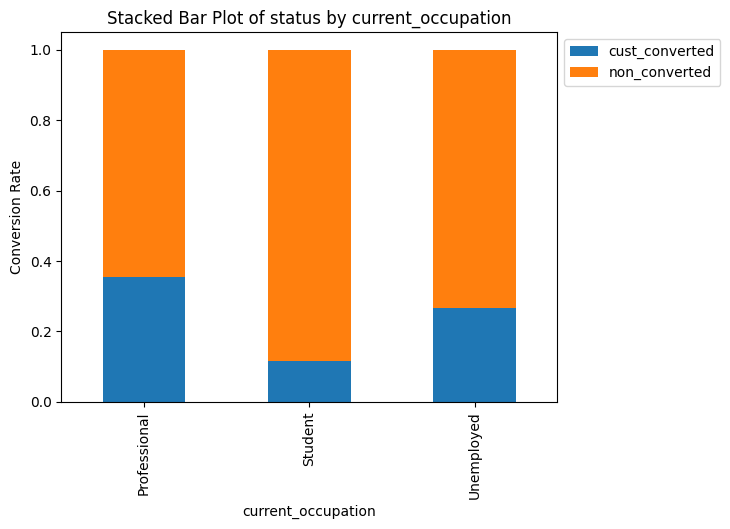

In [25]:
stacked_barplot(data, "current_occupation", "status")

**Observations**
*   The highest conversion rate is for professionals followed by unemployed and student which is in line with the overall number of leads.

#### **First Interaction v Conversion**

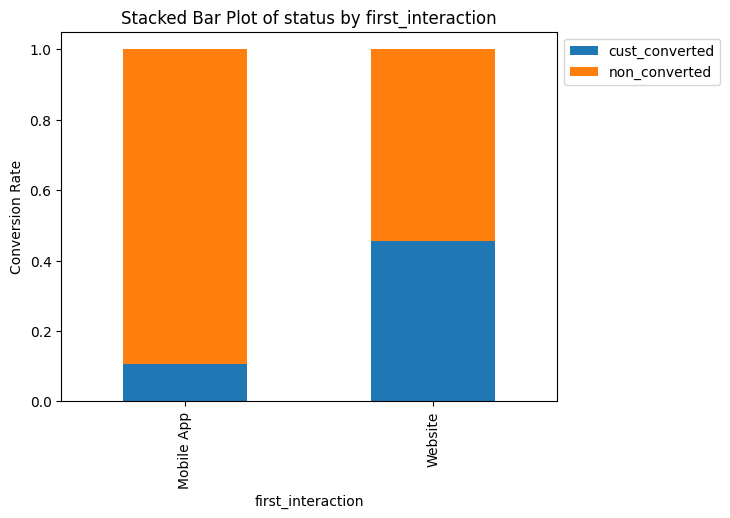

In [26]:
stacked_barplot(data, "first_interaction", "status")

**Observations**
*   The number of conversions is overwhelmingly favors the website users, roughly 50% are converting from that medium versus only about 10% from the mobile app.

####**Profile Completed v Conversion**

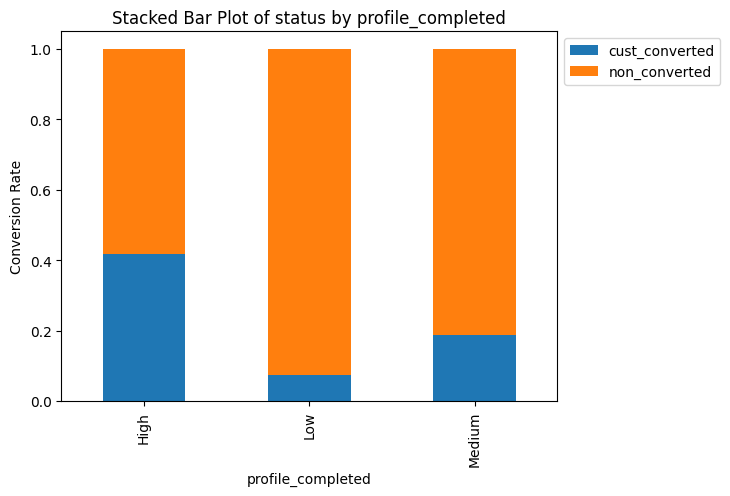

In [27]:
stacked_barplot(data, "profile_completed", "status")

**Observations**
*   As expected, the highest percentage of users who convert make the most progress on the profile.

####**Website Visits v Conversion**

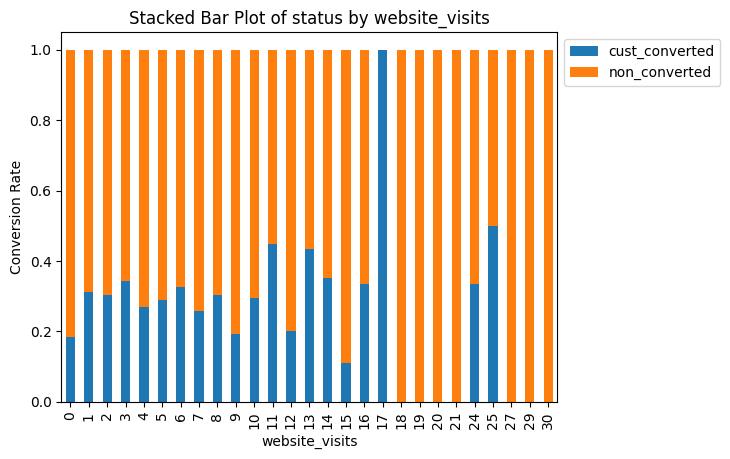

In [28]:
stacked_barplot(data, "website_visits", "status")

**Observations**
*   The conversion rate is uniformally distributed from 0 to 16 and then 24-25 except for the 17 visit bucket, which is likely just an anomaly.

####**Last activity v Conversion**

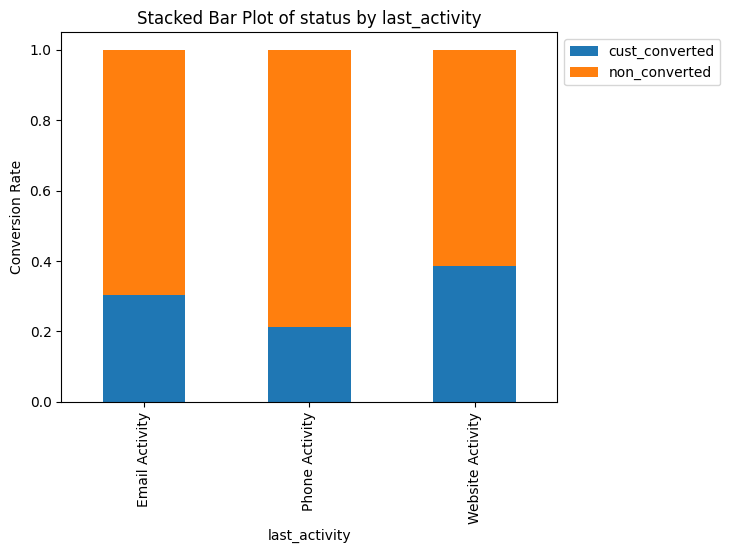

In [29]:
stacked_barplot(data, "last_activity", "status")

**Observations**
*   Last website activity has the highest conversion rate which is counter to email being the most used activity.
*   This suggests concentrating efforts on the website activity may lead to the best results.

####**Media v Conversion**

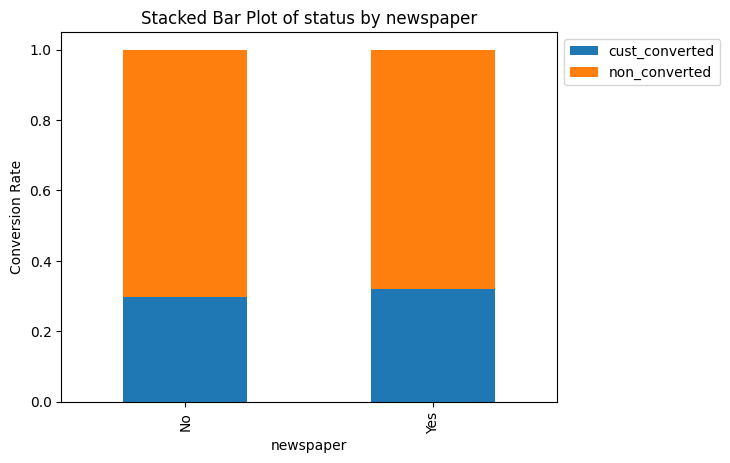

In [30]:
stacked_barplot(data, "newspaper", "status")

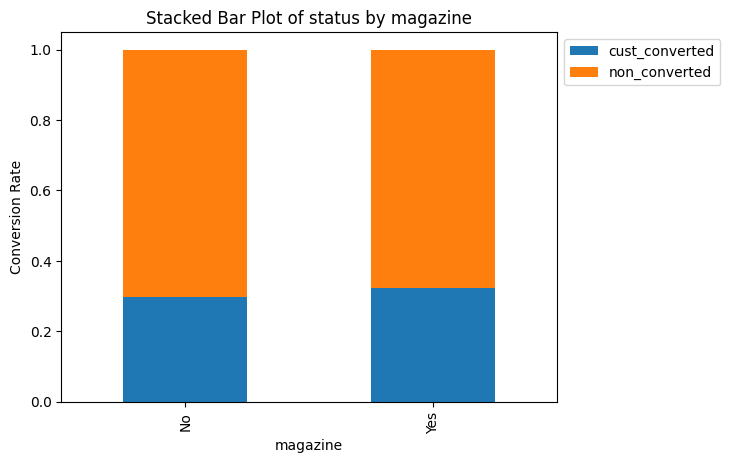

In [31]:
stacked_barplot(data, "magazine", "status")

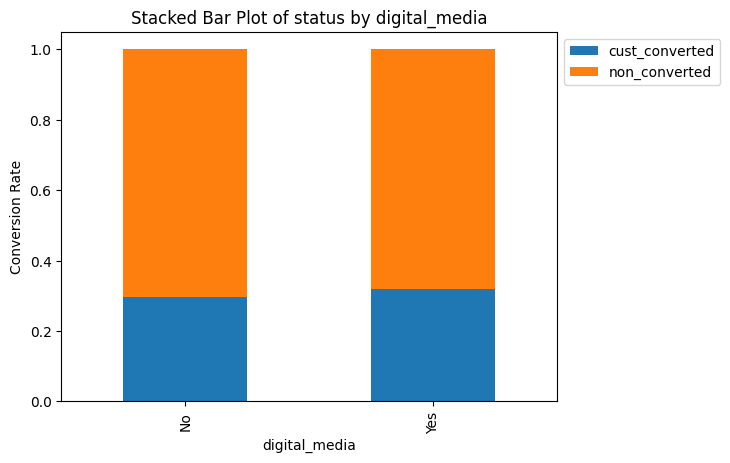

In [32]:
stacked_barplot(data, "digital_media", "status")

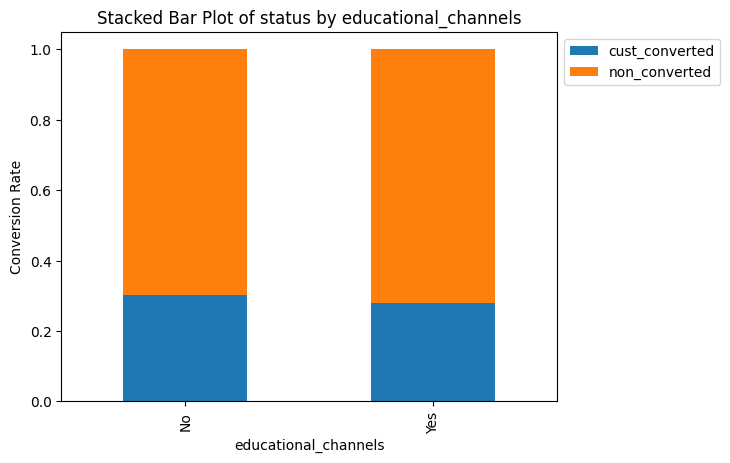

In [33]:
stacked_barplot(data, "educational_channels", "status")

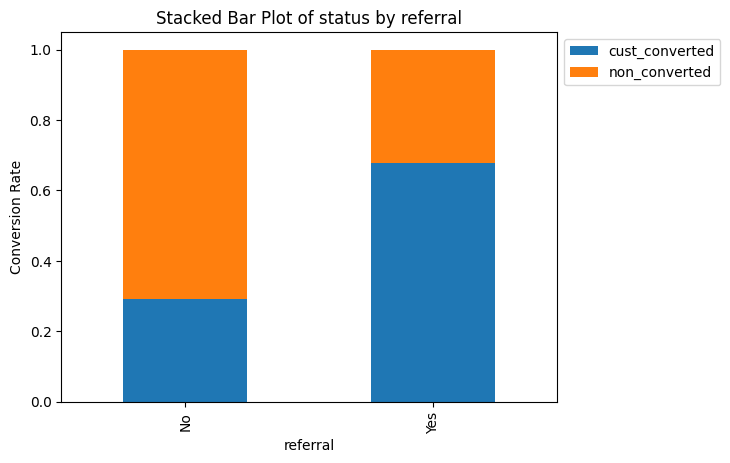

In [34]:
stacked_barplot(data, "referral", "status")

**Observations**
*   All media types have ~30% impact on conversions except referral which has ~70% conversion rate.
*   Referrals are the hardest channel to directly improve since it is based on public perception. The best way to improve this is to execute on a well thought roadmap that hopefully provides a better user experience than the competition. Improved execution in addition to marketing will increase referral traffic and brand awareness across the board.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [35]:
# convert media columns to 0 and 1
# List of columns to convert
columns_to_convert = ['newspaper', 'magazine', 'digital_media', 'educational_channels', 'referral']

# Convert 'Yes' to 1 and 'No' to 0 for each specified column
data[columns_to_convert] = data[columns_to_convert].replace({'Yes': 1, 'No': 0})

# Creating one-hot encoded variables for the categorical columns
# drop_first=True is used to avoid redundant variables
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
    dtype = int
)

# Rename poor encoding columns
data.rename(columns={'last_activity_Phone Activity': 'last_activity_phone', 'last_activity_Website Activity': 'last_activity_website'}, inplace=True)

In [36]:
# Separating independent variables and the target variable
x = data.drop('status', axis=1)

y = data['status']

In [37]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [38]:
# Checking the shape of the train and test data
print("Shape of x training set : ", x_train.shape)
print("Shape of x test set : ", x_test.shape)
print("-" * 50)
print("Shape of y training set : ", y_train.shape)
print("Shape of y test set : ", y_test.shape)

Shape of x training set :  (3689, 16)
Shape of x test set :  (923, 16)
--------------------------------------------------
Shape of y training set :  (3689,)
Shape of y test set :  (923,)


## Model Performance evaluation and improvement

In [39]:
# Function to compute different metrics to check performance of the classification models
def model_performance_classification(model, x_test, y_test):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    x_test: independent variables
    y_test: dependent variable
    """

    y_pred = model.predict(x_test)                           # Predict using the independent variables
    y_prob = model.predict_proba(x_test)[:, 1]          # Probabilities for ROC-AUC

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    df_perf = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "ROC-AUC": roc_auc
        },
        index=[0],
    )

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return df_perf

## Building a Decision Tree model

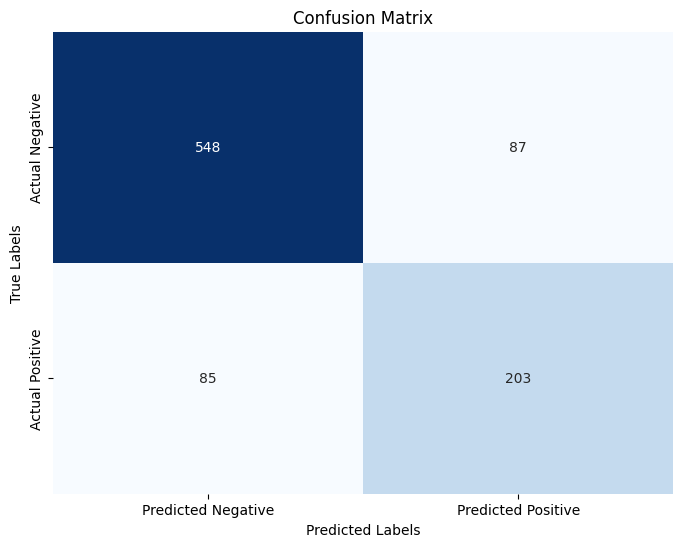

,Accuracy,Precision,Recall,F1,ROC-AUC
0,0.81365,0.70000,0.70486,0.70242,0.78393


In [40]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state = 42)

# Fitting the model
dt_classifier.fit(x_train, y_train)

# Model Performance on the test data, i.e., prediction
dt_classifier_perf = model_performance_classification(dt_classifier, x_test, y_test)

dt_classifier_perf

Best decision tree classifier: DecisionTreeClassifier(max_depth=6, random_state=42)


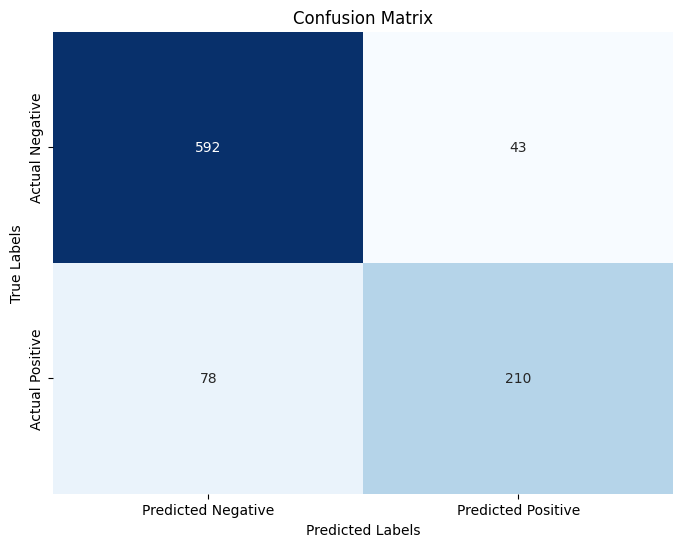

,Accuracy,Precision,Recall,F1,ROC-AUC
0,0.86891,0.83004,0.72917,0.77634,0.92621


In [41]:
# Grid of parameters to choose from
dt_parameters = {
    "max_depth": [3, 6, 9, 12, None]
}

# Run the grid search and use f1 bc the status is imbalanced (mostly non paying customers)
dt_grid_obj = GridSearchCV(dt_classifier, dt_parameters, scoring = 'f1', cv = 5, n_jobs=-1)

dt_grid_obj = dt_grid_obj.fit(x_train, y_train)

# Set the dt_tuned_classifier to the best combination of parameters
dt_tuned_classifier = dt_grid_obj.best_estimator_
print(f"Best decision tree classifier: {dt_tuned_classifier}")

dt_tuned_classifier.fit(x_train, y_train)

# Model Performance on the test data
dt_tuned_classifier_perf = model_performance_classification(dt_tuned_classifier, x_test, y_test)

dt_tuned_classifier_perf

## Building a Random Forest model

Best random forest classifier: RandomForestClassifier(max_depth=7, max_features=0.8, n_estimators=120,
                       random_state=42)


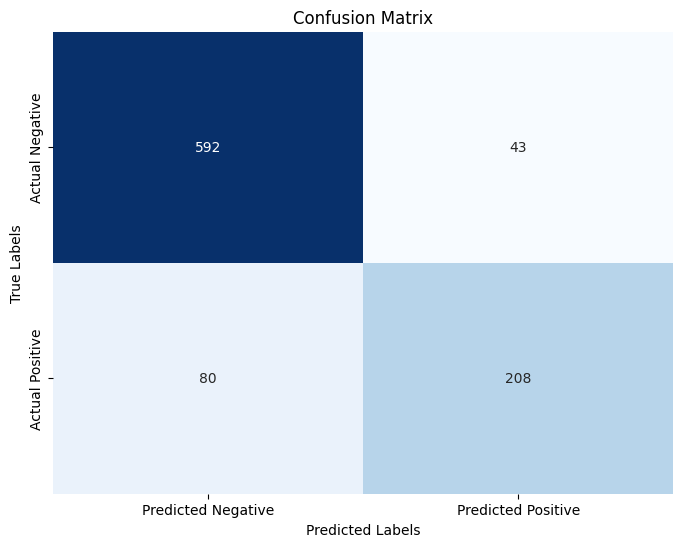

,Accuracy,Precision,Recall,F1,ROC-AUC
0,0.86674,0.82869,0.72222,0.77180,0.93243


In [42]:
rf_tuned = RandomForestClassifier(random_state = 42)

# Grid of parameters to choose from
rf_parameters = {"n_estimators": [100, 110, 120, 130, 150, 200],
    "max_depth": [5, 7, 10, 15, 20, None],
    "max_features": ['auto', 'sqrt', 'log2', 0.5, 0.8, 1, 5]
}

# Run the grid search
rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = 'f1', cv = 5, n_jobs=-1)

rf_grid_obj = rf_grid_obj.fit(x_train, y_train)

# Set the rf_tuned_classifier to the best combination of parameters
rf_tuned_classifier = rf_grid_obj.best_estimator_
print(f"Best random forest classifier: {rf_tuned_classifier}")

rf_tuned_classifier.fit(x_train, y_train)

# Model Performance on the test data
rf_tuned_classifier_perf = model_performance_classification(rf_tuned_classifier, x_test, y_test)

rf_tuned_classifier_perf

##Bagging Classifier

Best bagging classifier: BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  max_features=0.8, max_samples=0.75, random_state=42)


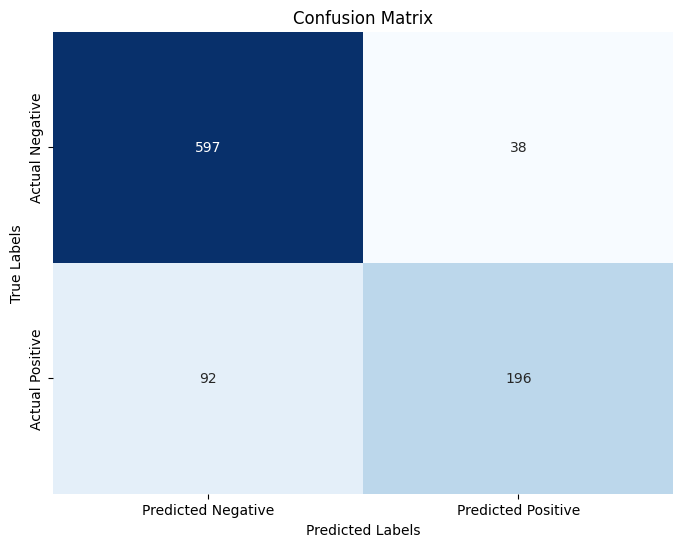

,Accuracy,Precision,Recall,F1,ROC-AUC
0,0.85915,0.83761,0.68056,0.75096,0.91982


In [43]:
# Define the base estimator
base_estimator = DecisionTreeClassifier()

param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', 0.5, 0.8, 1, 5],
    'base_estimator__max_depth': [None, 5, 10, 15]  # Adding max_depth for the base estimator
}

# Initialize GridSearchCV with the BaggingClassifier
grid_search = GridSearchCV(BaggingClassifier(base_estimator=base_estimator, random_state=42),
                           param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

bagging_tuned_classifier = grid_search.best_estimator_
print(f"Best bagging classifier: {bagging_tuned_classifier}")

bagging_tuned_classifier.fit(x_train, y_train)

bagging_tuned_classifier_perf = model_performance_classification(bagging_tuned_classifier, x_test, y_test)

bagging_tuned_classifier_perf

##XGBoost Classifier

In [44]:
# Installing the xgboost library using the 'pip' command
!pip install xgboost

Best xgb classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


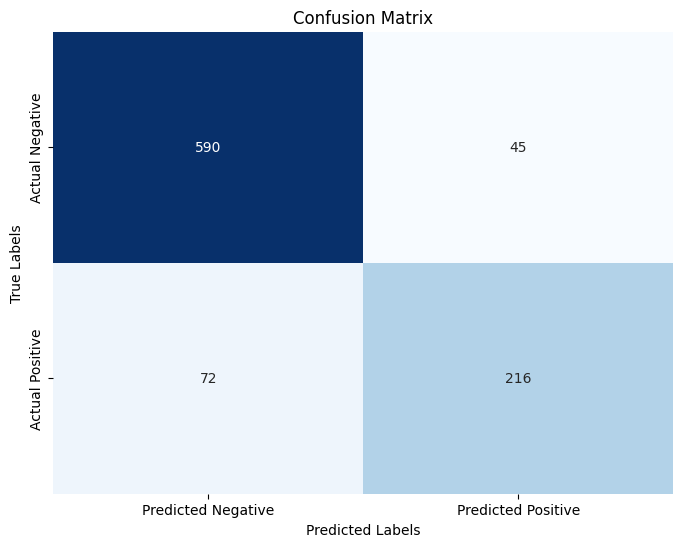

,Accuracy,Precision,Recall,F1,ROC-AUC
0,0.87324,0.82759,0.75000,0.78689,0.93402


In [45]:
import xgboost as xgb
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 4, 5, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(x_train, y_train)

xgb_tuned_classifier = grid_search.best_estimator_
print(f"Best xgb classifier: {xgb_tuned_classifier}")

xgb_tuned_classifier.fit(x_train, y_train)
xgb_tuned_classifier_perf = model_performance_classification(xgb_tuned_classifier, x_test, y_test)

xgb_tuned_classifier_perf

##Performance Comparison

In [46]:
models_comp_df = pd.concat(
    [
        dt_tuned_classifier_perf.T,
        rf_tuned_classifier_perf.T,
        bagging_tuned_classifier_perf.T,
        xgb_tuned_classifier_perf.T
    ],
    axis = 1,
)

models_comp_df.columns = [
    "Decision Tree Tuned Classifier",
    "Random Forest Tuned Classifier",
    "Bagging Tuned Classifier",
    "XG Boost Tuned Classifier"]

print("Test performance comparison:")

models_comp_df.T

Test performance comparison:


,Accuracy,Precision,Recall,F1,ROC-AUC
Decision Tree Tuned Classifier,0.86891,0.83004,0.72917,0.77634,0.92621
Random Forest Tuned Classifier,0.86674,0.82869,0.72222,0.77180,0.93243
Bagging Tuned Classifier,0.85915,0.83761,0.68056,0.75096,0.91982
XG Boost Tuned Classifier,0.87324,0.82759,0.75000,0.78689,0.93402


**Observations**


*   XGBoost is the best performing algorithm of all the tuned models. It has the highest accuracy, precision, recall, F1 and ROC-AUC.
*   The Decision Tree model did surprisingly well, nearly matching the much more computationally intensive Random Forest Classifier.



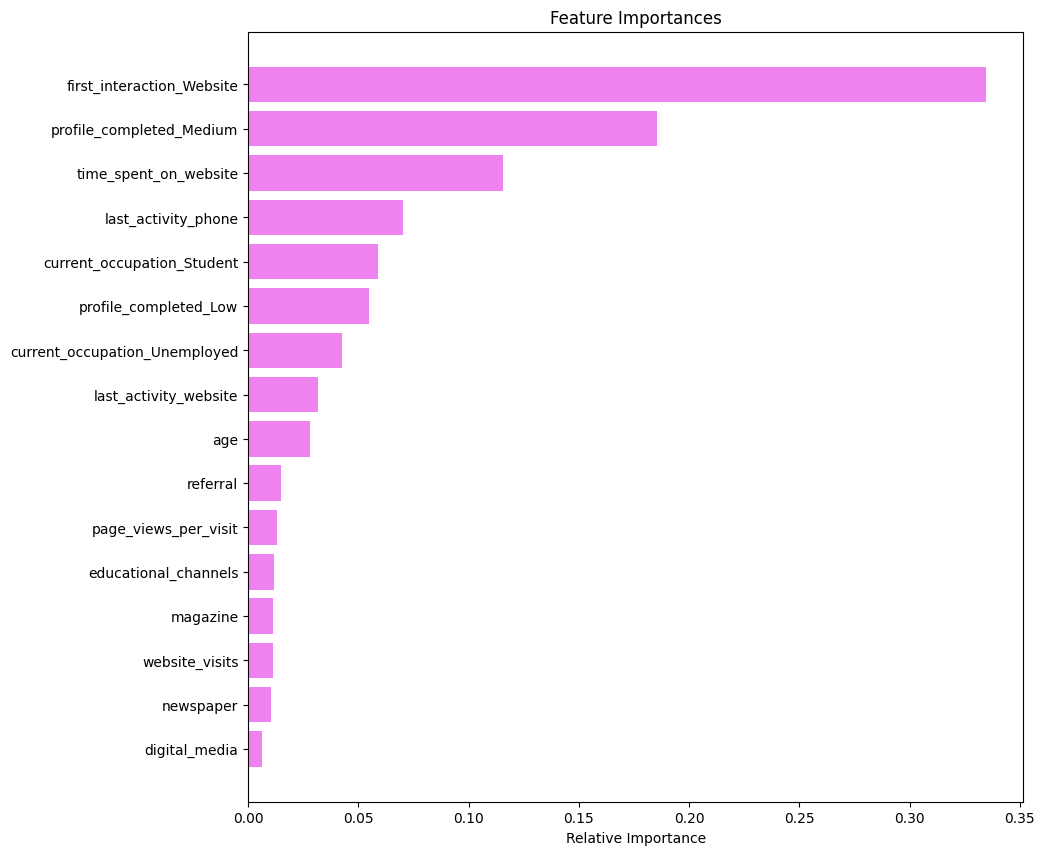

In [47]:
# Plotting the feature importance
features = list(x.columns)

importances = xgb_tuned_classifier.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations**

*   As EDA suggests, first interaction with the website is the most important feature when looking at conversions.
*   The next most imporant feature is whether the lead completed a significant part of the profile, which makes sense because this shows time investment from the lead and signifies a more serious customer.
*   The next most important features are time spent on the website and the last activity from the phone, which also makes sense intuitively.
*   The rest of the features have lower importance.



## Actionable Insights and Recommendations

Several key findings were made which could increase the number of leads to paying customers, they include:
*   The top number of conversions occur when the first interaction with ExtraaLearn is through the website. This means marketing resources should try and point customers there first and the mobile app second. This is likely due to ease of use and not needing to install another app so streamlining this medium is key to increasing conversions.
*   Another key determinant is the completion level of the profile. Since profile_completed high was removed with one-hot encoding, it follows that it would have been an even higher indicator than Medium (which was still the second-most important feature) due to its contribution toward conversion above 40% found in EDA.
*    Another key metric to maximize is the amount of time spent on the website. Creating a streamlined and engaging product that adds consistent value for customers would greatly aid conversions. Perhaps offering a free trial or showing extensive demo videos of the product would aid in convincing leads to convert.
*   The majority of users are seasoned professional (given the age analysis and tendency for the age range to be 55-60), so targeting marketing and the experience itself to that group would be beneficial in converting that segment. A secondary concern would be targeting those that are unemployed and looking to upskill to get back into the job market.
*   Regarding media channel, they are all performing roughly evenly, with the exception of referrals which have a much greater impact on conversion. This channel may be improved by nudging paying customers  to provide positive reviews, increase targeted marketing at seasoned professionals, and provide a streamlined, value added product experience that customers enjoy. Lastly, getting regular customer feedback to drive areas of improvement is key to improving overall sentiment about the product.
*   Finally, a number of decision tree, random forest, bagging, and XGBoost models were tuned with the XGBoost model performing best to predict with 87% accuracy whether a lead will convert to a paying customer or not. ExtraaLearn can use this to provide estimates about the next next crop of marketing leads and what success they might achieve.